<a href="https://www.kaggle.com/code/heyrobin/the-songs-of-indian-birds?scriptVersionId=97460626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML; import urllib.request

def apply_styling_changes():
    get_url= urllib.request.urlopen('https://raw.githubusercontent.com/heyrobin/heyrobin-personalization/main/theme.css').read().decode("utf-8")
    return HTML("<style>"+get_url+"</style>")
apply_styling_changes()

<div class="page-title">The Songs of Indian Birds</div>
<div class="page-summary "> Statistical analysis of indian birds.</div>

<img src="https://github.com/heyrobin/Birds-identify-eda/blob/main/banner.jpg?raw=true">

Some birds are little as finger and some are larger than a dog but each species has a unique distinctions and sounds. A morning with a chirp of little birb can make your morning delight but sad part of this reality is they are getting extinct every year we hear the news of them getting extinct.

In this notebook we are looking at the types of birds found in india and there sounds. I created the seprate dataset with the country name of the species found I created a function below which takes lattitude and logitude data to country name.

This notebook only contains the analysis of the birds. Do upvote and share if you enjoy the notebook.

In [2]:
#Data
import numpy as np
import pandas as pd

#vizuals
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import librosa
import librosa.display
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (14,4)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

# Color Palettes
colors = ["#D8C7AD"]

#data

'''Location of the data'''
#!ls -GFlash --color ../input/birdclef-2022/

link = "../input/birdclef-2022"
train = pd.read_csv(link + '/train_metadata.csv')

birb = pd.read_csv("../input/bird-location/newdat.csv")

india_df = birb[birb["country"]=="India"]
india_df = india_df[['primary_label','type','latitude','longitude','scientific_name','common_name','rating','time','filename','geom','geoms','city','country','country_code']]
india_df.head()

,primary_label,type,latitude,longitude,scientific_name,common_name,rating,time,filename,geom,geoms,city,country,country_code
429,bcnher,['call'],10.1369,76.4567,Nycticorax nycticorax,Black-crowned Night-Heron,4.0,07:00,bcnher/XC282624.ogg,"10.1369,76.4567",bf,NaN,India,in
752,bcnher,"['Insect sounds in background', 'adult', 'flig...",13.1609,80.2447,Nycticorax nycticorax,Black-crowned Night-Heron,3.0,18:30,bcnher/XC604399.ogg,"13.1609,80.2447",bf,NaN,India,in
826,bcnher,['call'],29.5854,78.8624,Nycticorax nycticorax,Black-crowned Night-Heron,2.5,6:00am,bcnher/XC73031.ogg,"29.5854,78.8624",bf,NaN,India,in
827,bcnher,['Call'],29.5854,78.8624,Nycticorax nycticorax,Black-crowned Night-Heron,2.5,6:00am,bcnher/XC73032.ogg,"29.5854,78.8624",bf,NaN,India,in
953,bkbplo,['flight call'],19.4034,72.7627,Pluvialis squatarola,Black-bellied Plover,2.0,12:00,bkbplo/XC165368.ogg,"19.4034,72.7627",bf,Vasai - Virar,India,in


In [3]:
# I have created dataset for new location below is the following code

'''from tqdm import tqdm
from geopy.geocoders import Nominatim

# joining latitude and longitude to a new column
train["geom"] = train["latitude"].map(str) + ',' + train["longitude"].map(str)

#looping and appending the 3 new location column from lat and long
city = []
country_code = []
country = []

for i in tqdm(train["geom"]):
    try:
        geolocator = Nominatim(user_agent="http")
        location = geolocator.reverse(i)
        Country = location.raw.get('address').get('country')
        City = location.raw.get('address').get('city')
        Country_code = location.raw.get('address').get('country_code')
    except:
        print("none")
    print(Country,City,Country_code)
    city.append(City)
    country_code.append(Country_code)
    country.append(Country)


#creating new columns
train["country"] = pd.Series(country)
train["city"] = pd.Series(city)
train["country_code"] = pd.Series(country_code)

train.to_csv('newdat.csv')'''


# Function
# Add Image
def imager(link,X,Y,Zoom):
    fig.add_layout_image(
        dict(
            source=link,
            xref="paper", yref="paper",
            x=X,y=Y,
            sizex=Zoom, sizey=Zoom,
            xanchor="right", yanchor="bottom"
        )
    )
    

# Add Text    
def texter(Text,X,Y,sizer,font):
    fig.add_annotation(text=Text,
                  xref="paper", yref="paper",
                  x=X,y=Y, showarrow=False,
                    font=dict(
                        family=font,
                        size=sizer,
                        color="#4c4e4d"
                        ))

<div class="page-title2 "> Species</div>

These are the lists of all the indian species found in the dataset. We have <b>30</b> species and from diffrent locations.

In [4]:
Datas = india_df["common_name"].value_counts().reset_index().sort_values(by='common_name')

# Creating the bar chart
trace = go.Bar(
    y = Datas["index"],
    x = Datas["common_name"],
    orientation = "h",
    marker_color= "#4F7177",
    text = Datas["common_name"],
)

layout = dict(
    width = 600,
    height= 1000,
    plot_bgcolor = "#FFFFFF",
    font=dict(family='Arial',
              size=12, 
              color='black'),
    margin = dict(
        l=0,
        r=0,
        b=100,
        t=100,
        pad=0
    ),
    xaxis = dict(showline=True, linewidth=1.45, linecolor="#4F7177",gridcolor='#D5D7D8',
                 #griddash='dot',
                 title_text='Counts'),
    yaxis = dict(showline=True, linewidth=1.45, linecolor="#4F7177",ticksuffix = "  ",title_text='Name'),
    bargap = 0.15,hoverlabel_bgcolor="#4F7177",hovermode="x"
)

fig = go.Figure(data = trace, layout = layout)

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True


#text
texter("Indian Birds Species",0.001,1.10,28,"Work Sans")
texter("Birds found in the dataset",0,1.06,18,"Source Sans Pro")
texter("heyRobin!",1.00,-0.06,16,"Playfair Display")


fig.show()

<div class="page-title2 "> Location</div>

In [5]:
fig = px.scatter_geo(
    india_df,
    lat="latitude",
    lon="longitude",
    color="common_name",
    width=1000,
    height=800,
    title="Birds Species",
    #projection="natural earth",
    projection="mercator",
    scope='asia'
)
fig.update_layout(title = 'Species in India',
                  dragmode=False,
                 geo=dict(bgcolor= '#E1E3D8'))
fig.update_geos(fitbounds='locations')
fig.show()


<div class="page-title2 "> Bird Recordings</div>

The following data includes all the audio files in the data. We will display the recordings and audio spectrum<br> of all the indian birds present in the data.

<h2>Indian Peafowl</h2>



<p><img src="https://cdn.download.ams.birds.cornell.edu/api/v1/asset/97326721/1800" width="400" height="500"></p>

<p>Peafowl is a common name for three bird species in the genera Pavo and Afropavo within the tribe Pavonini of the family Phasianidae, <br>the pheasants and their allies.</p>

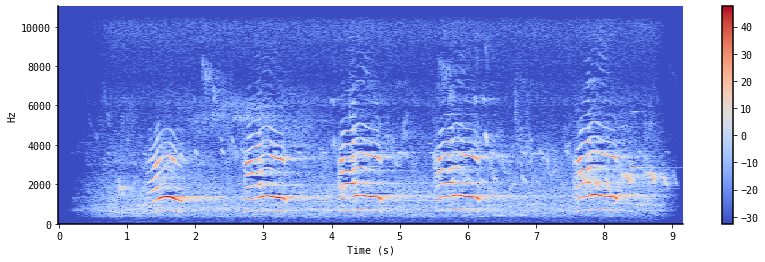

In [6]:
# function
# name represents the selected bird
#num represents number of audio in the selected bird

def bird(num,name):
    loca = india_df[india_df['common_name'] == name]["filename"].values[num]
    all = link+'/train_audio/'+loca
    #diplay wave
    ar, sr = librosa.load(link+'/train_audio/'+loca, duration=10)
    arr = librosa.stft(ar)
    arr_db = librosa.amplitude_to_db(abs(arr))
    librosa.display.specshow(arr_db, sr=sr, x_axis='s', y_axis='hz')
    plt.colorbar()
    return ipd.Audio(all)

bird(10,"Indian Peafowl")

<h2>Black-crowned Night-Heron</h2>



<p><img src="https://cdn.download.ams.birds.cornell.edu/api/v1/asset/304988121/1800" width="400" height="500"></p>

<p>The black-crowned night heron, or black-capped night heron, commonly shortened to just night heron in Eurasia,<br> is a medium-sized heron found throughout a large part of the world,<br> including parts of Europe, Asia, and North and South America.</p>

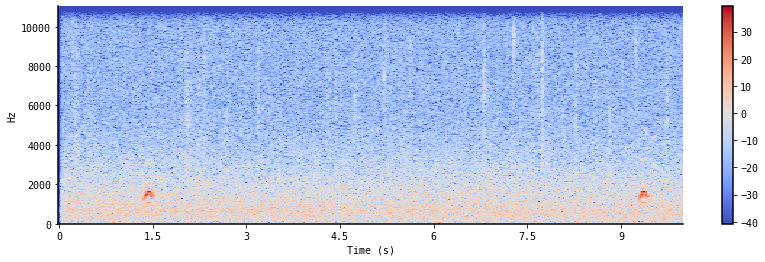

In [7]:
bird(2,"Black-crowned Night-Heron")

<h2>Black-bellied Plover</h2>

<p><img src="https://cdn.download.ams.birds.cornell.edu/api/v1/asset/297925101/1800" width="400" height="500"></p>

<p>Black-bellied Plovers are a dazzling mix of snow white and jet black, accented by checkerboard wings. <br>They are supreme aerialists, both agile and swift, and are readily identified at great distance by <br>black axillaries (“armpit” feathers) in all plumages—and by their distinctive, mournful-sounding call. <br>The largest and heaviest of North American plovers, Black-bellied is also the hardiest, breeding farther <br>north than other species, at the very top of the world. It is also a very widespread shorebird,<br> occurring on six continents.</p>

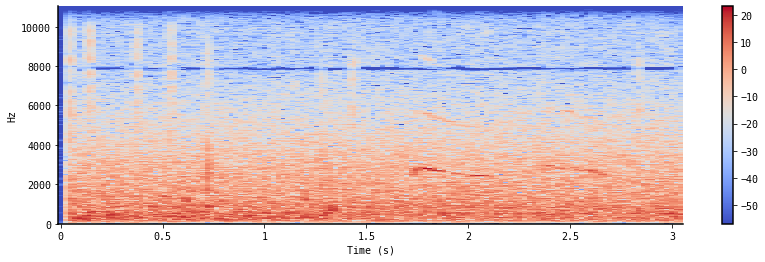

In [8]:
bird(3,"Black-bellied Plover")

# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#D8C7AD;font-size:120%;">  WORK IN PROGRESS 🕊️</span><a id="1"></a> 